<a href="https://colab.research.google.com/github/HTxSlayer/AI-Powered-Mental-Health-Assistant/blob/main/gloves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!unzip "/content/drive/MyDrive/gloves.v1i.yolov8.zip" -d "/content/notes"

Streaming output truncated to the last 5000 lines.
  inflating: /content/notes/train/labels/image_294_jpg.rf.05615cdf73ae1cbceecf4a39f6d700f2.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.5eaea7602c943dab7427fb6c609ca5f7.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.60537eb8c6cc9e85001da655b80d4f6b.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.76a1a482107ea955493d17b307286dd0.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.7e05f2f2d003c605a2fb22b783242170.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.bbb0084424d8be568439718b2071a8da.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.d6fef54458249f169d6716360450e6b2.txt  
  inflating: /content/notes/train/labels/image_294_jpg.rf.e93980c78f831546087910d0407646e5.txt  
  inflating: /content/notes/train/labels/image_295_jpg.rf.3e3e4d866c00f5fa5d2255c5e10806c4.txt  
  inflating: /content/notes/train/labels/image_295_jpg.rf.784dfab7f75bd9c48e

In [16]:
!pip install ultralytics

In [18]:
# example: 50 epochs, img size 640, batch 16 (adjust to your GPU)
!yolo task=detect mode=train model=yolov8n.pt data=/content/notes/data.yaml epochs=50 imgsz=640 batch=32


Ultralytics 8.3.237 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/notes/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

Upload an image file (jpg/png)...


Saving download.jpg to download (1).jpg

image 1/1 /content/download (1).jpg: 448x640 1 gloves, 9.1ms
Speed: 2.6ms preprocess, 9.1ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


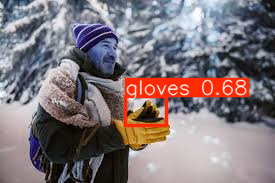

1. gloves  conf=0.679  bbox=[125.71855163574219, 96.23989868164062, 166.2169189453125, 125.0478515625]


In [19]:
# Colab: upload an image, run YOLOv8 model, show annotated result + detections
from google.colab import files
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# 1) Upload image
print("Upload an image file (jpg/png)...")
up = files.upload()
img_path = list(up.keys())[0]   # filename in current dir

# 2) load your trained model (change path if needed)
model = YOLO("runs/detect/train/weights/last.pt")  # or path/to/your/best.pt

# 3) predict
results = model.predict(source=img_path, conf=0.10, save=False)  # set save=True to save annotated image

# 4) show annotated image (Ultralytics results provide .plot())
annotated = results[0].plot()   # returns a numpy array
display(Image.fromarray(annotated))

# 5) print detections (class id, name, confidence, bbox)
names = {0: "gloves", 1: "no_gloves"}   # change if different
boxes = results[0].boxes  # Boxes object
if boxes is None or len(boxes) == 0:
    print("No detections.")
else:
    for i,box in enumerate(boxes):
        cls = int(box.cls[0].item())
        conf = float(box.conf[0].item())
        xyxy = box.xyxy[0].tolist()  # [x1,y1,x2,y2]
        print(f"{i+1}. {names.get(cls,cls)}  conf={conf:.3f}  bbox={xyxy}")
